KMeans clustering completed!
Cluster assignments for first 10 samples:
[1 4 8 7 4 5 1 0 4 4]


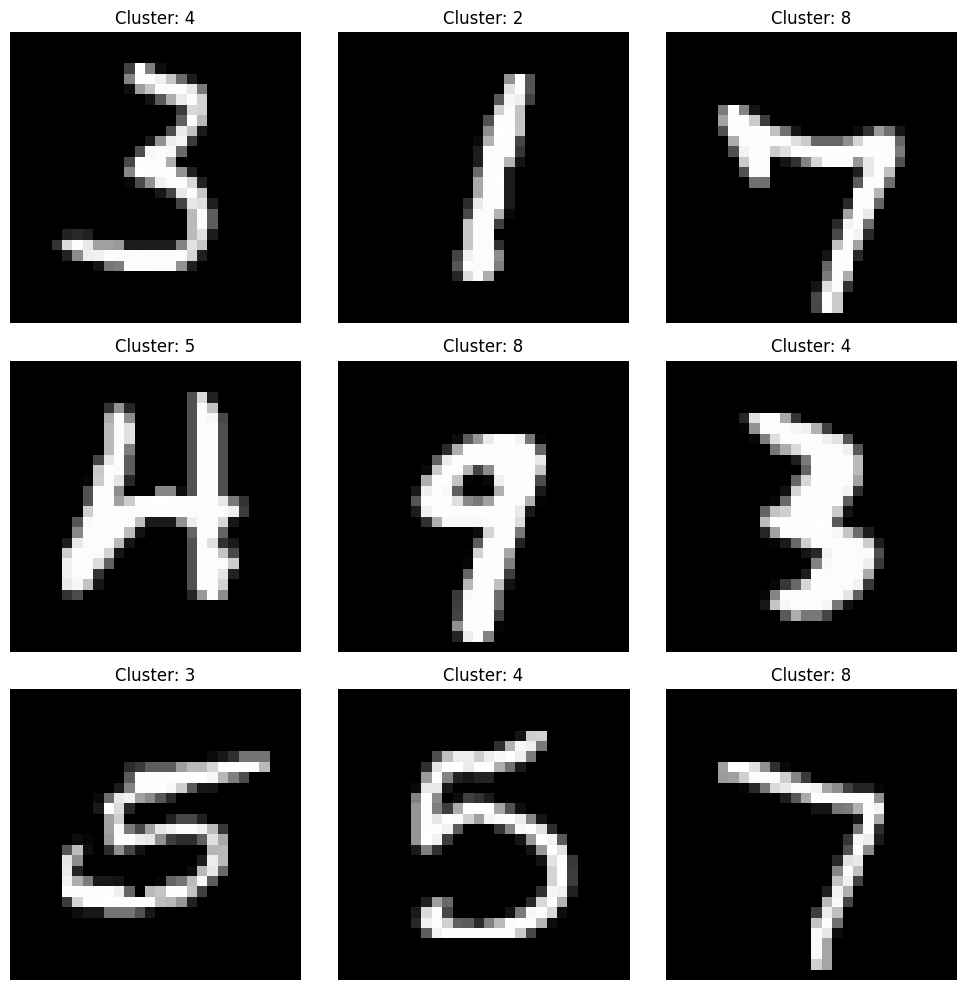

Running t-SNE dimensionality reduction...


/home/aiml-machine/FML-experiments/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed!


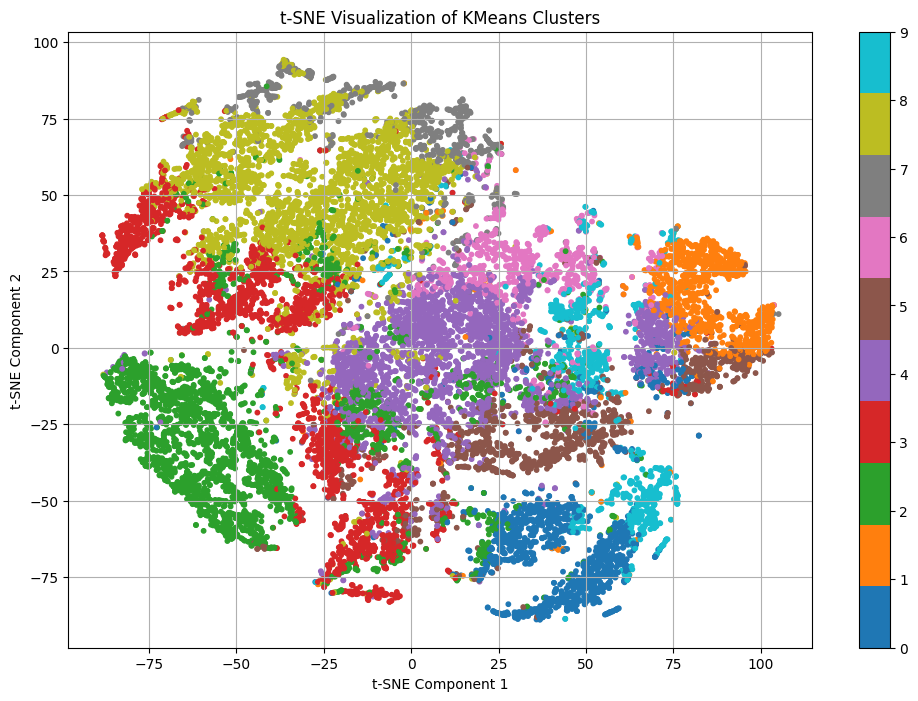

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the dataset without assuming any header
file_path = 'mnist_train_small.csv'  # Replace with your actual training file path
data = pd.read_csv(file_path, header=None)

# Rename columns
column_names = ['label'] + [f'pixel{i}' for i in range(784)]
data.columns = column_names

# Separate pixel features (ignore labels for clustering)
X = data.iloc[:, 1:]

# Scale the pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering
k = 10  # Number of clusters (digits 0-9)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Cluster labels assigned to each image
cluster_labels = kmeans.labels_

print("KMeans clustering completed!")
print(f"Cluster assignments for first 10 samples:\n{cluster_labels[:10]}")

# --- Optional: Visualize a few clustered images ---
num_samples = 9
random_indices = np.random.choice(len(X), num_samples, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    image = X.iloc[idx].values.reshape(28, 28)
    cluster_id = cluster_labels[idx]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Cluster: {cluster_id}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- New: t-SNE Visualization of Clusters ---

# Reduce dimensionality to 2D using t-SNE
print("Running t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print("t-SNE completed!")

# Plot t-SNE output colored by KMeans cluster labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE Visualization of KMeans Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()